In [23]:
import numpy as np
import random
from CompilerQC import Graph
from CompilerQC import core
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from CompilerQC import Polygons
from CompilerQC import Energy
from CompilerQC import MC
from scipy.special import binom
import networkx as nx

In [24]:
N = 5
graph = Graph.complete(N)

In [25]:
nn = core.largest_complete_bipartite_graph(graph)
K_nn = core.complete_bipartite_graph(*nn)
U, V = core.parts_of_complete_bipartite_graph(graph.to_nx_graph(), K_nn)
core_qbits, core_coords = core.qbits_and_coords_of_core(U, V)

In [26]:
polygon_object = Polygons(graph, core_bipartite_sets=[U, V])
energy_object = Energy(polygon_object)
mc = MC(energy_object, temperatur_schedule=' 3 / np.log(x)')
mc.n_total_steps = 3

In [27]:
steps = []
moves_per_step = []
temp = []
found_plaqs = []
for i in range(100):
    steps.append(mc.n_total_steps)
    delta_x = mc.apply_from_sampling('cauchy')
    moves_per_step.append(delta_x)
    temp.append(mc.temperature())
    found_plaqs.append(mc.polygon.n_found_plaqs())

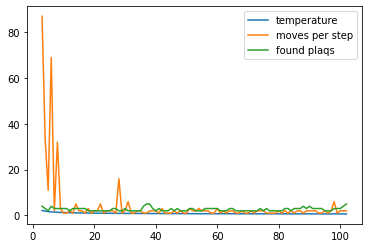

In [29]:
plt.plot(steps, temp, label='temperature')
plt.plot(steps, moves_per_step, label='moves per step')
plt.plot(steps, found_plaqs, label='found plaqs')

plt.legend()


In [21]:
mc.polygon.n_found_plaqs()

3

In [ ]:
plt.plot(steps, temp, label='temperature')
print(mc.n_total_steps, 300 / np.log(mc.n_total_steps))
mc.temperature()

In [ ]:
1 / np.log(4)

In [ ]:
# mc = MC(polygon_object, temperature=1, UV = [U, V])
# mc.terms = [1,0,1]
for i in range(1000):
    # mc.update_temperature(10)
    #mc.apply("contract", 10)
    mc.apply_from_sampling()
    # mc.apply('swap_lines_in_core', 0)
    # mc.apply('grow_core', 1)

# success = mc.energy.distance_to_plaquette() - polygon_object.C